In [46]:
# @title PRAVEEN CHANDRASEKARAN
# email: pc2846@g.rit.edu

# Importing essential NN libraries
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix,precision_score
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# For Math
import numpy as np
import os

# For Data Viz.
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

In [47]:
# Load MNIST dataset from Keras
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28)

### Before Nomalizing input lables

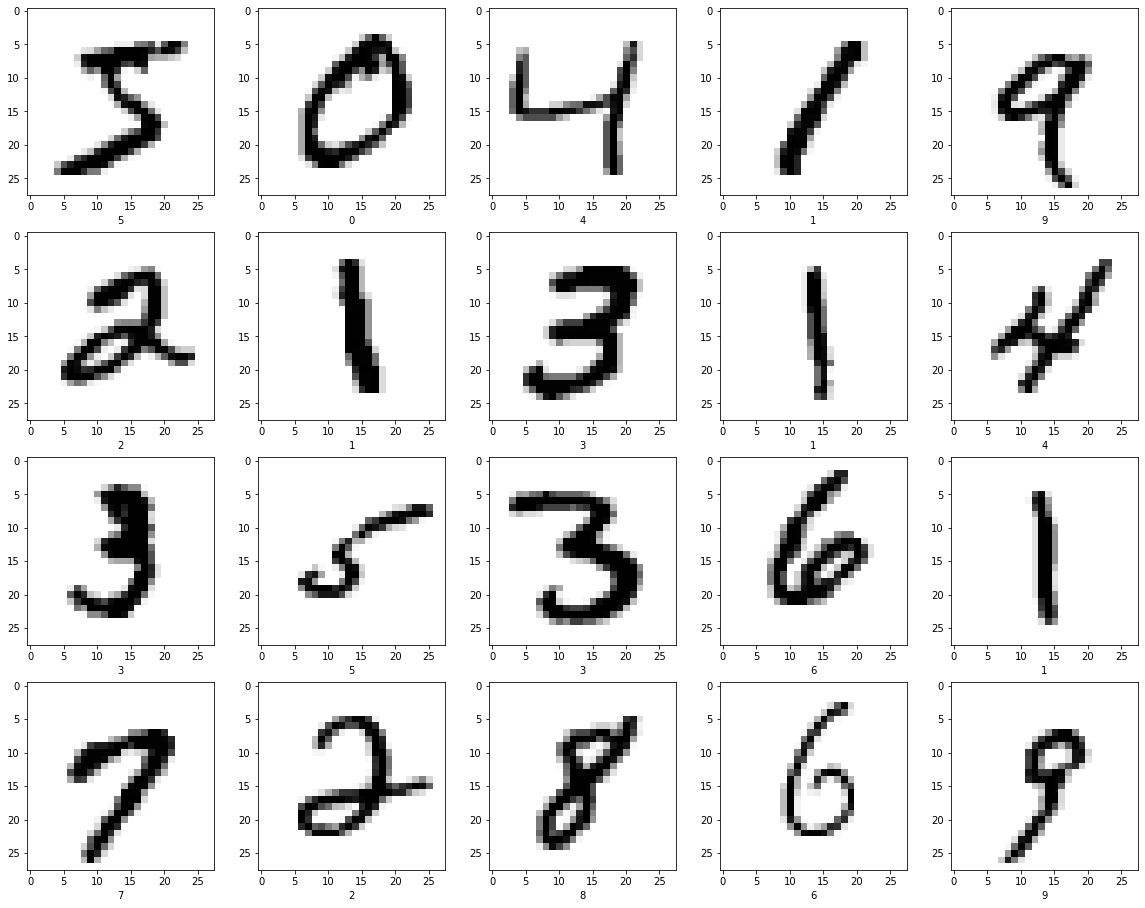

In [49]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [50]:
# Data normalization - Step 2
x_train = tensorflow.keras.utils.normalize(x_train, axis=1)
x_test = tensorflow.keras.utils.normalize(x_test, axis=1)

### After Normalizing input lables

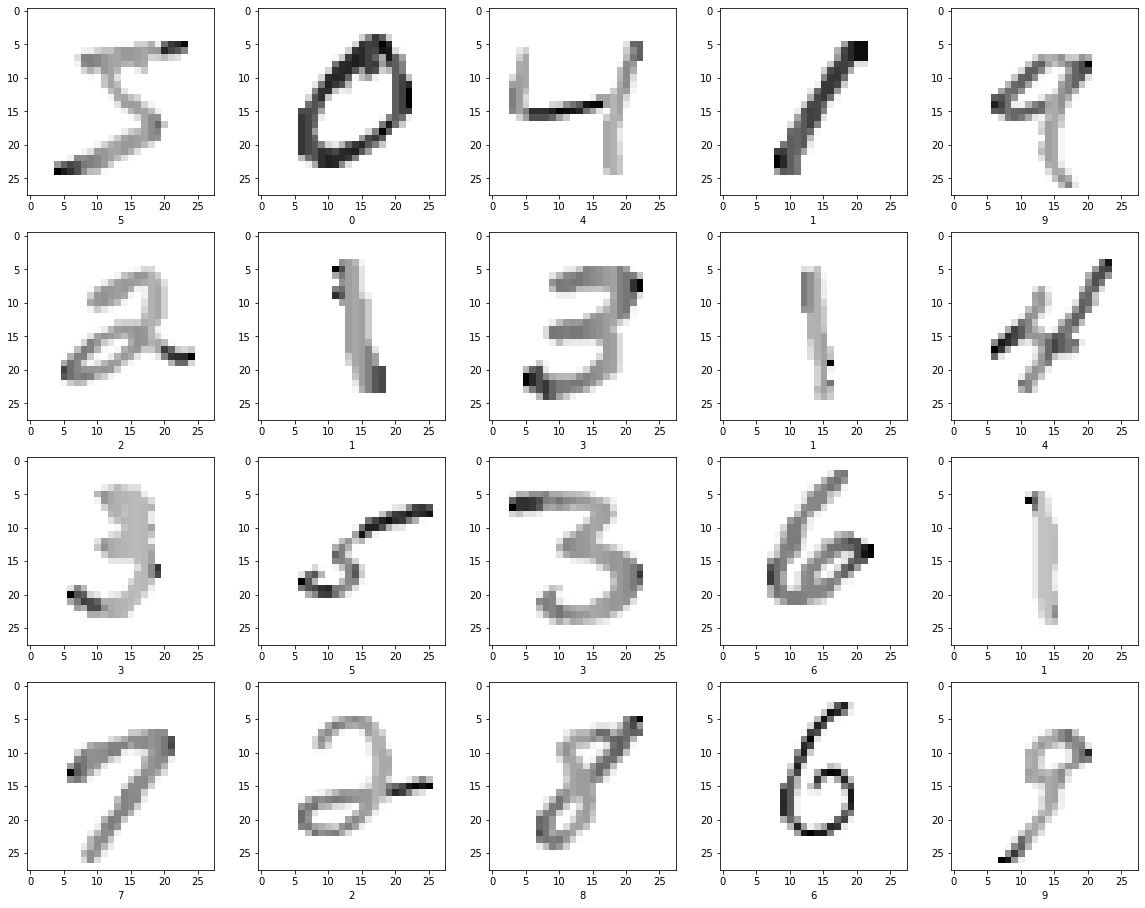

In [51]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**Observation**: Images are distorted after scalling the dataset as there will be loss of exact data as the values in the 2d matrix are scaled between 0 and 1. However, this will help in impoving the accuracy or in other words, we can reduce the loss and this enables the model to converge towards a decent much faster

In [52]:
# Shape of the input x_train data
print("Shape of the input x_train data before reshaping:")
print("(",x_train.shape[1],",",x_train.shape[2],")")

Shape of the input x_train data before reshaping:
( 28 , 28 )


In [53]:
# Reshaping 2D image data to 1D 
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

### After reshaping to 1D array

In [54]:
# Displaying the shapes of the train and test input datasets 
print("Shape of x_train: ")
print("(", x_train_flattened.shape[1],",", "1)")
print()
print("Shape of x_test: ")
print("(", x_test_flattened.shape[1],",", "1)")

Shape of x_train: 
( 784 , 1)

Shape of x_test: 
( 784 , 1)


In [55]:
# One hot encoding for categorical target labels 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Transforming above target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3

**Neural Network Architecture:**
<br>
<br>
Number of classes: 10 (Ten unique digits)
<br>
<br>
Number of layers: 4
<br>
<br>
Number of Nodes in each layer: 64
<br>
<br>
Activation funtions used in each layer: 
- Input layer => Relu
- Hidden layer => Relu
- Output layer => Softmax (multi-class classification problem)

In [56]:
# Stochastic Gradient Decent is being used as an optimizer for this problem 

# Setting the params for Stochastic Gradient Decent
num_classes = 10
epochs = 64
learningRate = 0.1
decay_rate = learningRate/epochs # As the epochs increase the decay rate decreases
momentum_value = 0.8

# Stochastic Gradient Decent for compiling the NN model later
#Default values for SGD. lr=0.1, m=0, decay=0
#Nesterov has stronger theoretical converge guarantees for convex functions.
sgd = keras.optimizers.SGD(learning_rate = learningRate, momentum = momentum_value, decay = decay_rate, nesterov=False)

In [57]:
# Flattened input dimension
input_dim = x_train_flattened.shape[1] # The input layer requires the special input_shape parameter which should match
print("Input shape to be fed into the input layer:", input_dim)

Input shape to be fed into the input layer: 784


In [58]:
# Building the NN model - 1

def nn_model():
    
    # Model type selected
    model = Sequential()
    
    # Dense layers are fully connected layers
    # Adding a input dense layer with input number of nodes = 64, Using Relu as activation function, 
    # setting uniform weights to the nodes 
    model.add(Dense(64, activation='relu', kernel_initializer='uniform', input_dim = input_dim)) 
    
    # Adding dropout at this layer as 20% for avoiding overfitting 
    model.add(Dropout(0.2))
    
    # Adding hidden layer with same params
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    
    # Adding the last layer with softmax activation as this is a multi-class classification problem 
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    
    # Compile the model using loss as categorical_crossentropy as this is a classification problem with the params defined above
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

In [59]:
# Model summary
exp_model = nn_model()
print(exp_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
# Exponential decay used instead of static learning rate of 0.1
# 𝑙𝑟 = 𝑙𝑟₀ × 𝑒**(−𝑘𝑡) # Instead of constant steps for learning rate a decreasing exponential function is used as epochs go by

def exp_decay(epoch):
    lrate = learningRate * np.exp(-decay_rate*epoch)
    return lrate

In [61]:
# Creating Model Checkpoint

# Specifying the path where the file has to be stored 
checkpoint_path = r"./"

# Create a callback that saves the model's weights
model_checkPoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, 
                                                save_weights_only=True,
                                                save_freq=20)
#C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5"

In [62]:
# learning schedule callback
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list_for_model_1 = [lr_rate, model_checkPoint]

In [63]:
# Fitting the model

# Batch Size 
batch_size = 100

# Fitting model with all params
exp_history = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs, callbacks= callbacks_list_for_model_1, verbose=1,
                        validation_data=(x_test_flattened, y_test))


Epoch 1/64
 18/600 [..............................] - ETA: 1s - loss: 2.3024 - acc: 0.1172  
Epoch 00001: saving model to .\
 38/600 [>.............................] - ETA: 2s - loss: 2.2988 - acc: 0.1192
Epoch 00001: saving model to .\
 57/600 [=>............................] - ETA: 2s - loss: 2.2960 - acc: 0.1188
Epoch 00001: saving model to .\
 78/600 [==>...........................] - ETA: 2s - loss: 2.2827 - acc: 0.1673
Epoch 00001: saving model to .\
 97/600 [===>..........................] - ETA: 2s - loss: 2.2291 - acc: 0.2089
Epoch 00001: saving model to .\
101/600 [====>.........................] - ETA: 2s - loss: 2.2052 - acc: 0.2224
Epoch 00001: saving model to .\
137/600 [=====>........................] - ETA: 2s - loss: 1.9255 - acc: 0.3255
Epoch 00001: saving model to .\
157/600 [======>.......................] - ETA: 2s - loss: 1.7871 - acc: 0.3767
Epoch 00001: saving model to .\
173/600 [=======>......................] - ETA: 2s - loss: 1.6904 - acc: 0.4123
Epoch 00001

212/600 [=========>....................] - ETA: 2s - loss: 0.2101 - acc: 0.9376
Epoch 00003: saving model to .\
233/600 [==========>...................] - ETA: 2s - loss: 0.2129 - acc: 0.9374
Epoch 00003: saving model to .\
252/600 [===========>..................] - ETA: 2s - loss: 0.2116 - acc: 0.9375
Epoch 00003: saving model to .\
273/600 [============>.................] - ETA: 2s - loss: 0.2099 - acc: 0.9379
Epoch 00003: saving model to .\
293/600 [=============>................] - ETA: 2s - loss: 0.2100 - acc: 0.9379
Epoch 00003: saving model to .\
313/600 [==============>...............] - ETA: 2s - loss: 0.2086 - acc: 0.9382
Epoch 00003: saving model to .\
333/600 [===============>..............] - ETA: 1s - loss: 0.2069 - acc: 0.9387
Epoch 00003: saving model to .\
353/600 [================>.............] - ETA: 1s - loss: 0.2066 - acc: 0.9386
Epoch 00003: saving model to .\
373/600 [=================>............] - ETA: 1s - loss: 0.2064 - acc: 0.9388
Epoch 00003: saving mode

432/600 [====================>.........] - ETA: 1s - loss: 0.1617 - acc: 0.9522
Epoch 00005: saving model to .\
452/600 [=====================>........] - ETA: 1s - loss: 0.1609 - acc: 0.9525
Epoch 00005: saving model to .\
471/600 [======================>.......] - ETA: 1s - loss: 0.1609 - acc: 0.9526
Epoch 00005: saving model to .\
500/600 [========================>.....] - ETA: 0s - loss: 0.1596 - acc: 0.9529
Epoch 00005: saving model to .\
520/600 [=========================>....] - ETA: 0s - loss: 0.1600 - acc: 0.9525
Epoch 00005: saving model to .\
532/600 [=========================>....] - ETA: 0s - loss: 0.1605 - acc: 0.9522
Epoch 00005: saving model to .\
552/600 [==========================>...] - ETA: 0s - loss: 0.1608 - acc: 0.9522
Epoch 00005: saving model to .\
579/600 [===========================>..] - ETA: 0s - loss: 0.1609 - acc: 0.9522
Epoch 00005: saving model to .\
599/600 [============================>.] - ETA: 0s - loss: 0.1609 - acc: 0.9521
Epoch 00005: saving mode

 13/600 [..............................] - ETA: 2s - loss: 0.1306 - acc: 0.9562
Epoch 00008: saving model to .\
 35/600 [>.............................] - ETA: 3s - loss: 0.1434 - acc: 0.9534
Epoch 00008: saving model to .\
 41/600 [=>............................] - ETA: 4s - loss: 0.1400 - acc: 0.9554
Epoch 00008: saving model to .\
 80/600 [===>..........................] - ETA: 3s - loss: 0.1319 - acc: 0.9594
Epoch 00008: saving model to .\
 91/600 [===>..........................] - ETA: 3s - loss: 0.1327 - acc: 0.9588
Epoch 00008: saving model to .\
112/600 [====>.........................] - ETA: 3s - loss: 0.1354 - acc: 0.9581
Epoch 00008: saving model to .\
140/600 [======>.......................] - ETA: 3s - loss: 0.1331 - acc: 0.9591
Epoch 00008: saving model to .\
153/600 [======>.......................] - ETA: 3s - loss: 0.1354 - acc: 0.9588
Epoch 00008: saving model to .\
173/600 [=======>......................] - ETA: 3s - loss: 0.1364 - acc: 0.9590
Epoch 00008: saving mode

231/600 [==========>...................] - ETA: 2s - loss: 0.1198 - acc: 0.9653
Epoch 00010: saving model to .\
251/600 [===========>..................] - ETA: 2s - loss: 0.1202 - acc: 0.9648
Epoch 00010: saving model to .\
280/600 [=============>................] - ETA: 2s - loss: 0.1202 - acc: 0.9646
Epoch 00010: saving model to .\
291/600 [=============>................] - ETA: 2s - loss: 0.1207 - acc: 0.9642
Epoch 00010: saving model to .\
301/600 [==============>...............] - ETA: 2s - loss: 0.1201 - acc: 0.9643
Epoch 00010: saving model to .\
336/600 [===============>..............] - ETA: 1s - loss: 0.1212 - acc: 0.9638
Epoch 00010: saving model to .\
351/600 [================>.............] - ETA: 1s - loss: 0.1219 - acc: 0.9635
Epoch 00010: saving model to .\
371/600 [=================>............] - ETA: 1s - loss: 0.1217 - acc: 0.9634
Epoch 00010: saving model to .\
391/600 [==================>...........] - ETA: 1s - loss: 0.1209 - acc: 0.9635
Epoch 00010: saving mode

452/600 [=====================>........] - ETA: 1s - loss: 0.1181 - acc: 0.9643
Epoch 00012: saving model to .\
473/600 [======================>.......] - ETA: 1s - loss: 0.1177 - acc: 0.9645
Epoch 00012: saving model to .\
493/600 [=======================>......] - ETA: 0s - loss: 0.1178 - acc: 0.9644
Epoch 00012: saving model to .\
511/600 [========================>.....] - ETA: 0s - loss: 0.1179 - acc: 0.9643
Epoch 00012: saving model to .\
532/600 [=========================>....] - ETA: 0s - loss: 0.1179 - acc: 0.9644
Epoch 00012: saving model to .\
553/600 [==========================>...] - ETA: 0s - loss: 0.1187 - acc: 0.9642
Epoch 00012: saving model to .\
572/600 [===========================>..] - ETA: 0s - loss: 0.1187 - acc: 0.9643
Epoch 00012: saving model to .\
593/600 [============================>.] - ETA: 0s - loss: 0.1189 - acc: 0.9641
Epoch 00012: saving model to .\
600/600 [==============================] - 5s 9ms/step - loss: 0.1187 - acc: 0.9641 - val_loss: 0.1070 -

 33/600 [>.............................] - ETA: 3s - loss: 0.1019 - acc: 0.9688
Epoch 00015: saving model to .\
 53/600 [=>............................] - ETA: 4s - loss: 0.1010 - acc: 0.9704
Epoch 00015: saving model to .\
 72/600 [==>...........................] - ETA: 4s - loss: 0.1034 - acc: 0.9688
Epoch 00015: saving model to .\
 93/600 [===>..........................] - ETA: 3s - loss: 0.1058 - acc: 0.9680
Epoch 00015: saving model to .\
113/600 [====>.........................] - ETA: 3s - loss: 0.1071 - acc: 0.9672
Epoch 00015: saving model to .\
132/600 [=====>........................] - ETA: 3s - loss: 0.1073 - acc: 0.9673
Epoch 00015: saving model to .\
152/600 [======>.......................] - ETA: 3s - loss: 0.1094 - acc: 0.9666
Epoch 00015: saving model to .\
173/600 [=======>......................] - ETA: 3s - loss: 0.1113 - acc: 0.9662
Epoch 00015: saving model to .\
192/600 [========>.....................] - ETA: 3s - loss: 0.1104 - acc: 0.9666
Epoch 00015: saving mode

252/600 [===========>..................] - ETA: 2s - loss: 0.1065 - acc: 0.9672
Epoch 00017: saving model to .\
261/600 [============>.................] - ETA: 2s - loss: 0.1072 - acc: 0.9670
Epoch 00017: saving model to .\
299/600 [=============>................] - ETA: 2s - loss: 0.1067 - acc: 0.9673
Epoch 00017: saving model to .\
311/600 [==============>...............] - ETA: 2s - loss: 0.1060 - acc: 0.9676
Epoch 00017: saving model to .\
331/600 [===============>..............] - ETA: 1s - loss: 0.1073 - acc: 0.9673
Epoch 00017: saving model to .\
351/600 [================>.............] - ETA: 1s - loss: 0.1070 - acc: 0.9674
Epoch 00017: saving model to .\
371/600 [=================>............] - ETA: 1s - loss: 0.1069 - acc: 0.9674
Epoch 00017: saving model to .\
391/600 [==================>...........] - ETA: 1s - loss: 0.1063 - acc: 0.9676
Epoch 00017: saving model to .\
412/600 [===================>..........] - ETA: 1s - loss: 0.1062 - acc: 0.9677
Epoch 00017: saving mode

471/600 [======================>.......] - ETA: 1s - loss: 0.1041 - acc: 0.9686
Epoch 00019: saving model to .\
491/600 [=======================>......] - ETA: 0s - loss: 0.1039 - acc: 0.9687
Epoch 00019: saving model to .\
513/600 [========================>.....] - ETA: 0s - loss: 0.1036 - acc: 0.9687
Epoch 00019: saving model to .\
532/600 [=========================>....] - ETA: 0s - loss: 0.1038 - acc: 0.9685
Epoch 00019: saving model to .\
553/600 [==========================>...] - ETA: 0s - loss: 0.1040 - acc: 0.9685
Epoch 00019: saving model to .\
573/600 [===========================>..] - ETA: 0s - loss: 0.1046 - acc: 0.9684
Epoch 00019: saving model to .\
593/600 [============================>.] - ETA: 0s - loss: 0.1045 - acc: 0.9684
Epoch 00019: saving model to .\
600/600 [==============================] - 5s 9ms/step - loss: 0.1045 - acc: 0.9684 - val_loss: 0.0994 - val_acc: 0.9714
Epoch 20/64
 12/600 [..............................] - ETA: 2s - loss: 0.0841 - acc: 0.9775
Epo

 53/600 [=>............................] - ETA: 3s - loss: 0.0893 - acc: 0.9732
Epoch 00022: saving model to .\
 73/600 [==>...........................] - ETA: 3s - loss: 0.0921 - acc: 0.9719
Epoch 00022: saving model to .\
 92/600 [===>..........................] - ETA: 3s - loss: 0.0936 - acc: 0.9713
Epoch 00022: saving model to .\
101/600 [====>.........................] - ETA: 3s - loss: 0.0936 - acc: 0.9706
Epoch 00022: saving model to .\
138/600 [=====>........................] - ETA: 3s - loss: 0.0934 - acc: 0.9709
Epoch 00022: saving model to .\
152/600 [======>.......................] - ETA: 3s - loss: 0.0941 - acc: 0.9708
Epoch 00022: saving model to .\
172/600 [=======>......................] - ETA: 3s - loss: 0.0955 - acc: 0.9706
Epoch 00022: saving model to .\
181/600 [========>.....................] - ETA: 3s - loss: 0.0946 - acc: 0.9707
Epoch 00022: saving model to .\
216/600 [=========>....................] - ETA: 2s - loss: 0.0949 - acc: 0.9708
Epoch 00022: saving mode

273/600 [============>.................] - ETA: 2s - loss: 0.0952 - acc: 0.9708
Epoch 00024: saving model to .\
294/600 [=============>................] - ETA: 2s - loss: 0.0957 - acc: 0.9709
Epoch 00024: saving model to .\
313/600 [==============>...............] - ETA: 2s - loss: 0.0958 - acc: 0.9709
Epoch 00024: saving model to .\
333/600 [===============>..............] - ETA: 1s - loss: 0.0972 - acc: 0.9702
Epoch 00024: saving model to .\
353/600 [================>.............] - ETA: 1s - loss: 0.0967 - acc: 0.9704
Epoch 00024: saving model to .\
375/600 [=================>............] - ETA: 1s - loss: 0.0963 - acc: 0.9705
Epoch 00024: saving model to .\
395/600 [==================>...........] - ETA: 1s - loss: 0.0962 - acc: 0.9705
Epoch 00024: saving model to .\
415/600 [===================>..........] - ETA: 1s - loss: 0.0965 - acc: 0.9705
Epoch 00024: saving model to .\
434/600 [====================>.........] - ETA: 1s - loss: 0.0975 - acc: 0.9700
Epoch 00024: saving mode

495/600 [=======================>......] - ETA: 0s - loss: 0.0968 - acc: 0.9711
Epoch 00026: saving model to .\
514/600 [========================>.....] - ETA: 0s - loss: 0.0974 - acc: 0.9709
Epoch 00026: saving model to .\
536/600 [=========================>....] - ETA: 0s - loss: 0.0970 - acc: 0.9711
Epoch 00026: saving model to .\
555/600 [==========================>...] - ETA: 0s - loss: 0.0969 - acc: 0.9712
Epoch 00026: saving model to .\
575/600 [===========================>..] - ETA: 0s - loss: 0.0968 - acc: 0.9712
Epoch 00026: saving model to .\
594/600 [============================>.] - ETA: 0s - loss: 0.0971 - acc: 0.9711
Epoch 00026: saving model to .\
600/600 [==============================] - 4s 7ms/step - loss: 0.0970 - acc: 0.9711 - val_loss: 0.0972 - val_acc: 0.9712
Epoch 27/64
 16/600 [..............................] - ETA: 2s - loss: 0.1019 - acc: 0.9737
Epoch 00027: saving model to .\
 37/600 [>.............................] - ETA: 2s - loss: 0.0982 - acc: 0.9738
Epo

 75/600 [==>...........................] - ETA: 2s - loss: 0.0892 - acc: 0.9731
Epoch 00029: saving model to .\
 92/600 [===>..........................] - ETA: 3s - loss: 0.0909 - acc: 0.9733
Epoch 00029: saving model to .\
101/600 [====>.........................] - ETA: 3s - loss: 0.0913 - acc: 0.9733
Epoch 00029: saving model to .\
137/600 [=====>........................] - ETA: 2s - loss: 0.0934 - acc: 0.9726
Epoch 00029: saving model to .\
152/600 [======>.......................] - ETA: 2s - loss: 0.0940 - acc: 0.9723
Epoch 00029: saving model to .\
171/600 [=======>......................] - ETA: 2s - loss: 0.0940 - acc: 0.9722
Epoch 00029: saving model to .\
181/600 [========>.....................] - ETA: 2s - loss: 0.0934 - acc: 0.9723
Epoch 00029: saving model to .\
201/600 [=========>....................] - ETA: 2s - loss: 0.0918 - acc: 0.9727
Epoch 00029: saving model to .\
221/600 [==========>...................] - ETA: 2s - loss: 0.0920 - acc: 0.9726
Epoch 00029: saving mode

294/600 [=============>................] - ETA: 2s - loss: 0.0924 - acc: 0.9717
Epoch 00031: saving model to .\
314/600 [==============>...............] - ETA: 2s - loss: 0.0928 - acc: 0.9715
Epoch 00031: saving model to .\
335/600 [===============>..............] - ETA: 1s - loss: 0.0924 - acc: 0.9717
Epoch 00031: saving model to .\
353/600 [================>.............] - ETA: 1s - loss: 0.0914 - acc: 0.9721
Epoch 00031: saving model to .\
375/600 [=================>............] - ETA: 1s - loss: 0.0915 - acc: 0.9718
Epoch 00031: saving model to .\
395/600 [==================>...........] - ETA: 1s - loss: 0.0919 - acc: 0.9717
Epoch 00031: saving model to .\
415/600 [===================>..........] - ETA: 1s - loss: 0.0919 - acc: 0.9716
Epoch 00031: saving model to .\
435/600 [====================>.........] - ETA: 1s - loss: 0.0925 - acc: 0.9716
Epoch 00031: saving model to .\
455/600 [=====================>........] - ETA: 1s - loss: 0.0926 - acc: 0.9716
Epoch 00031: saving mode

515/600 [========================>.....] - ETA: 0s - loss: 0.0904 - acc: 0.9726
Epoch 00033: saving model to .\
535/600 [=========================>....] - ETA: 0s - loss: 0.0906 - acc: 0.9725
Epoch 00033: saving model to .\
541/600 [==========================>...] - ETA: 0s - loss: 0.0904 - acc: 0.9726
Epoch 00033: saving model to .\
561/600 [===========================>..] - ETA: 0s - loss: 0.0905 - acc: 0.9726
Epoch 00033: saving model to .\
600/600 [==============================] - ETA: 0s - loss: 0.0909 - acc: 0.9726
Epoch 00033: saving model to .\
600/600 [==============================] - 4s 6ms/step - loss: 0.0909 - acc: 0.9726 - val_loss: 0.0947 - val_acc: 0.9722
Epoch 34/64
  1/600 [..............................] - ETA: 1s - loss: 0.1305 - acc: 0.9600
Epoch 00034: saving model to .\
 37/600 [>.............................] - ETA: 2s - loss: 0.0830 - acc: 0.9738
Epoch 00034: saving model to .\
 56/600 [=>............................] - ETA: 2s - loss: 0.0925 - acc: 0.9707
Epo

 93/600 [===>..........................] - ETA: 4s - loss: 0.0914 - acc: 0.9713
Epoch 00036: saving model to .\
113/600 [====>.........................] - ETA: 4s - loss: 0.0899 - acc: 0.9712
Epoch 00036: saving model to .\
139/600 [=====>........................] - ETA: 3s - loss: 0.0901 - acc: 0.9717
Epoch 00036: saving model to .\
158/600 [======>.......................] - ETA: 3s - loss: 0.0909 - acc: 0.9718
Epoch 00036: saving model to .\
179/600 [=======>......................] - ETA: 3s - loss: 0.0911 - acc: 0.9719
Epoch 00036: saving model to .\
199/600 [========>.....................] - ETA: 2s - loss: 0.0908 - acc: 0.9726
Epoch 00036: saving model to .\
219/600 [=========>....................] - ETA: 2s - loss: 0.0905 - acc: 0.9729
Epoch 00036: saving model to .\
239/600 [==========>...................] - ETA: 2s - loss: 0.0901 - acc: 0.9731
Epoch 00036: saving model to .\
259/600 [===========>..................] - ETA: 2s - loss: 0.0895 - acc: 0.9732
Epoch 00036: saving mode

312/600 [==============>...............] - ETA: 2s - loss: 0.0875 - acc: 0.9732
Epoch 00038: saving model to .\
332/600 [===============>..............] - ETA: 2s - loss: 0.0871 - acc: 0.9732
Epoch 00038: saving model to .\
352/600 [================>.............] - ETA: 2s - loss: 0.0875 - acc: 0.9730
Epoch 00038: saving model to .\
361/600 [=================>............] - ETA: 1s - loss: 0.0881 - acc: 0.9728
Epoch 00038: saving model to .\
393/600 [==================>...........] - ETA: 1s - loss: 0.0890 - acc: 0.9723
Epoch 00038: saving model to .\
420/600 [====================>.........] - ETA: 1s - loss: 0.0886 - acc: 0.9725
Epoch 00038: saving model to .\
432/600 [====================>.........] - ETA: 1s - loss: 0.0880 - acc: 0.9728
Epoch 00038: saving model to .\
452/600 [=====================>........] - ETA: 1s - loss: 0.0891 - acc: 0.9728
Epoch 00038: saving model to .\
472/600 [======================>.......] - ETA: 1s - loss: 0.0896 - acc: 0.9728
Epoch 00038: saving mode

533/600 [=========================>....] - ETA: 0s - loss: 0.0892 - acc: 0.9730
Epoch 00040: saving model to .\
553/600 [==========================>...] - ETA: 0s - loss: 0.0894 - acc: 0.9730
Epoch 00040: saving model to .\
571/600 [===========================>..] - ETA: 0s - loss: 0.0897 - acc: 0.9729
Epoch 00040: saving model to .\
591/600 [============================>.] - ETA: 0s - loss: 0.0890 - acc: 0.9731
Epoch 00040: saving model to .\
600/600 [==============================] - 5s 8ms/step - loss: 0.0888 - acc: 0.9732 - val_loss: 0.0933 - val_acc: 0.9734
Epoch 41/64
 20/600 [>.............................] - ETA: 1s - loss: 0.0888 - acc: 0.9685
Epoch 00041: saving model to .\
 38/600 [>.............................] - ETA: 2s - loss: 0.0800 - acc: 0.9739
Epoch 00041: saving model to .\
 51/600 [=>............................] - ETA: 3s - loss: 0.0796 - acc: 0.9741
Epoch 00041: saving model to .\
 72/600 [==>...........................] - ETA: 3s - loss: 0.0792 - acc: 0.9747
Epo

113/600 [====>.........................] - ETA: 3s - loss: 0.0856 - acc: 0.9742
Epoch 00043: saving model to .\
132/600 [=====>........................] - ETA: 3s - loss: 0.0842 - acc: 0.9745
Epoch 00043: saving model to .\
152/600 [======>.......................] - ETA: 3s - loss: 0.0847 - acc: 0.9743
Epoch 00043: saving model to .\
161/600 [=======>......................] - ETA: 3s - loss: 0.0843 - acc: 0.9742
Epoch 00043: saving model to .\
194/600 [========>.....................] - ETA: 2s - loss: 0.0835 - acc: 0.9746
Epoch 00043: saving model to .\
211/600 [=========>....................] - ETA: 2s - loss: 0.0824 - acc: 0.9749
Epoch 00043: saving model to .\
231/600 [==========>...................] - ETA: 2s - loss: 0.0827 - acc: 0.9745
Epoch 00043: saving model to .\
252/600 [===========>..................] - ETA: 2s - loss: 0.0833 - acc: 0.9744
Epoch 00043: saving model to .\
271/600 [============>.................] - ETA: 2s - loss: 0.0829 - acc: 0.9744
Epoch 00043: saving mode

332/600 [===============>..............] - ETA: 2s - loss: 0.0886 - acc: 0.9736
Epoch 00045: saving model to .\
352/600 [================>.............] - ETA: 2s - loss: 0.0879 - acc: 0.9739
Epoch 00045: saving model to .\
372/600 [=================>............] - ETA: 1s - loss: 0.0874 - acc: 0.9740
Epoch 00045: saving model to .\
392/600 [==================>...........] - ETA: 1s - loss: 0.0874 - acc: 0.9740
Epoch 00045: saving model to .\
411/600 [===================>..........] - ETA: 1s - loss: 0.0871 - acc: 0.9740
Epoch 00045: saving model to .\
432/600 [====================>.........] - ETA: 1s - loss: 0.0873 - acc: 0.9740
Epoch 00045: saving model to .\
452/600 [=====================>........] - ETA: 1s - loss: 0.0876 - acc: 0.9737
Epoch 00045: saving model to .\
472/600 [======================>.......] - ETA: 1s - loss: 0.0874 - acc: 0.9738
Epoch 00045: saving model to .\
493/600 [=======================>......] - ETA: 0s - loss: 0.0873 - acc: 0.9739
Epoch 00045: saving mode

552/600 [==========================>...] - ETA: 0s - loss: 0.0853 - acc: 0.9743
Epoch 00047: saving model to .\
571/600 [===========================>..] - ETA: 0s - loss: 0.0851 - acc: 0.9743
Epoch 00047: saving model to .\
592/600 [============================>.] - ETA: 0s - loss: 0.0856 - acc: 0.9743
Epoch 00047: saving model to .\
600/600 [==============================] - 5s 9ms/step - loss: 0.0853 - acc: 0.9743 - val_loss: 0.0922 - val_acc: 0.9730
Epoch 48/64
 14/600 [..............................] - ETA: 2s - loss: 0.1061 - acc: 0.9707
Epoch 00048: saving model to .\
 34/600 [>.............................] - ETA: 3s - loss: 0.0861 - acc: 0.9729
Epoch 00048: saving model to .\
 54/600 [=>............................] - ETA: 3s - loss: 0.0823 - acc: 0.9746
Epoch 00048: saving model to .\
 73/600 [==>...........................] - ETA: 3s - loss: 0.0841 - acc: 0.9747
Epoch 00048: saving model to .\
 93/600 [===>..........................] - ETA: 3s - loss: 0.0839 - acc: 0.9755
Epo

134/600 [=====>........................] - ETA: 3s - loss: 0.0847 - acc: 0.9750
Epoch 00050: saving model to .\
153/600 [======>.......................] - ETA: 2s - loss: 0.0831 - acc: 0.9753
Epoch 00050: saving model to .\
173/600 [=======>......................] - ETA: 2s - loss: 0.0816 - acc: 0.9755
Epoch 00050: saving model to .\
193/600 [========>.....................] - ETA: 2s - loss: 0.0835 - acc: 0.9745
Epoch 00050: saving model to .\
216/600 [=========>....................] - ETA: 2s - loss: 0.0828 - acc: 0.9751
Epoch 00050: saving model to .\
236/600 [==========>...................] - ETA: 2s - loss: 0.0829 - acc: 0.9750
Epoch 00050: saving model to .\
256/600 [===========>..................] - ETA: 2s - loss: 0.0829 - acc: 0.9748
Epoch 00050: saving model to .\
273/600 [============>.................] - ETA: 2s - loss: 0.0829 - acc: 0.9749
Epoch 00050: saving model to .\
292/600 [=============>................] - ETA: 2s - loss: 0.0839 - acc: 0.9747
Epoch 00050: saving mode

354/600 [================>.............] - ETA: 1s - loss: 0.0809 - acc: 0.9751
Epoch 00052: saving model to .\
373/600 [=================>............] - ETA: 1s - loss: 0.0801 - acc: 0.9753
Epoch 00052: saving model to .\
395/600 [==================>...........] - ETA: 1s - loss: 0.0805 - acc: 0.9749
Epoch 00052: saving model to .\
414/600 [===================>..........] - ETA: 1s - loss: 0.0805 - acc: 0.9750
Epoch 00052: saving model to .\
434/600 [====================>.........] - ETA: 1s - loss: 0.0803 - acc: 0.9751
Epoch 00052: saving model to .\
454/600 [=====================>........] - ETA: 0s - loss: 0.0809 - acc: 0.9749
Epoch 00052: saving model to .\
473/600 [======================>.......] - ETA: 0s - loss: 0.0816 - acc: 0.9748
Epoch 00052: saving model to .\
496/600 [=======================>......] - ETA: 0s - loss: 0.0814 - acc: 0.9748
Epoch 00052: saving model to .\
514/600 [========================>.....] - ETA: 0s - loss: 0.0814 - acc: 0.9748
Epoch 00052: saving mode

572/600 [===========================>..] - ETA: 0s - loss: 0.0825 - acc: 0.9749
Epoch 00054: saving model to .\
592/600 [============================>.] - ETA: 0s - loss: 0.0825 - acc: 0.9749
Epoch 00054: saving model to .\
600/600 [==============================] - 5s 8ms/step - loss: 0.0823 - acc: 0.9750 - val_loss: 0.0925 - val_acc: 0.9736
Epoch 55/64
 13/600 [..............................] - ETA: 2s - loss: 0.0752 - acc: 0.9762
Epoch 00055: saving model to .\
 33/600 [>.............................] - ETA: 3s - loss: 0.0868 - acc: 0.9739
Epoch 00055: saving model to .\
 53/600 [=>............................] - ETA: 3s - loss: 0.0863 - acc: 0.9742
Epoch 00055: saving model to .\
 74/600 [==>...........................] - ETA: 3s - loss: 0.0836 - acc: 0.9746
Epoch 00055: saving model to .\
 94/600 [===>..........................] - ETA: 3s - loss: 0.0839 - acc: 0.9740
Epoch 00055: saving model to .\
112/600 [====>.........................] - ETA: 3s - loss: 0.0841 - acc: 0.9741
Epo

156/600 [======>.......................] - ETA: 2s - loss: 0.0772 - acc: 0.9757
Epoch 00057: saving model to .\
176/600 [=======>......................] - ETA: 2s - loss: 0.0788 - acc: 0.9752
Epoch 00057: saving model to .\
181/600 [========>.....................] - ETA: 2s - loss: 0.0788 - acc: 0.9752
Epoch 00057: saving model to .\
211/600 [=========>....................] - ETA: 2s - loss: 0.0795 - acc: 0.9751
Epoch 00057: saving model to .\
232/600 [==========>...................] - ETA: 2s - loss: 0.0792 - acc: 0.9758
Epoch 00057: saving model to .\
252/600 [===========>..................] - ETA: 2s - loss: 0.0794 - acc: 0.9758
Epoch 00057: saving model to .\
261/600 [============>.................] - ETA: 2s - loss: 0.0794 - acc: 0.9757
Epoch 00057: saving model to .\
300/600 [==============>...............] - ETA: 1s - loss: 0.0792 - acc: 0.9757
Epoch 00057: saving model to .\
304/600 [==============>...............] - ETA: 1s - loss: 0.0793 - acc: 0.9756
Epoch 00057: saving mode

372/600 [=================>............] - ETA: 1s - loss: 0.0823 - acc: 0.9753
Epoch 00059: saving model to .\
391/600 [==================>...........] - ETA: 1s - loss: 0.0828 - acc: 0.9752
Epoch 00059: saving model to .\
412/600 [===================>..........] - ETA: 1s - loss: 0.0823 - acc: 0.9755
Epoch 00059: saving model to .\
431/600 [====================>.........] - ETA: 1s - loss: 0.0816 - acc: 0.9756
Epoch 00059: saving model to .\
453/600 [=====================>........] - ETA: 1s - loss: 0.0816 - acc: 0.9758
Epoch 00059: saving model to .\
471/600 [======================>.......] - ETA: 1s - loss: 0.0813 - acc: 0.9759
Epoch 00059: saving model to .\
492/600 [=======================>......] - ETA: 0s - loss: 0.0808 - acc: 0.9760
Epoch 00059: saving model to .\
511/600 [========================>.....] - ETA: 0s - loss: 0.0815 - acc: 0.9758
Epoch 00059: saving model to .\
531/600 [=========================>....] - ETA: 0s - loss: 0.0813 - acc: 0.9760
Epoch 00059: saving mode

592/600 [============================>.] - ETA: 0s - loss: 0.0798 - acc: 0.9755
Epoch 00061: saving model to .\
600/600 [==============================] - 5s 9ms/step - loss: 0.0801 - acc: 0.9754 - val_loss: 0.0909 - val_acc: 0.9736
Epoch 62/64
 12/600 [..............................] - ETA: 2s - loss: 0.0810 - acc: 0.9733
Epoch 00062: saving model to .\
 32/600 [>.............................] - ETA: 3s - loss: 0.0714 - acc: 0.9775
Epoch 00062: saving model to .\
 53/600 [=>............................] - ETA: 3s - loss: 0.0852 - acc: 0.9730
Epoch 00062: saving model to .\
 72/600 [==>...........................] - ETA: 3s - loss: 0.0815 - acc: 0.9750
Epoch 00062: saving model to .\
 93/600 [===>..........................] - ETA: 3s - loss: 0.0798 - acc: 0.9751
Epoch 00062: saving model to .\
112/600 [====>.........................] - ETA: 3s - loss: 0.0778 - acc: 0.9760
Epoch 00062: saving model to .\
133/600 [=====>........................] - ETA: 3s - loss: 0.0785 - acc: 0.9754
Epo

171/600 [=======>......................] - ETA: 3s - loss: 0.0784 - acc: 0.9765
Epoch 00064: saving model to .\
191/600 [========>.....................] - ETA: 2s - loss: 0.0781 - acc: 0.9766
Epoch 00064: saving model to .\
212/600 [=========>....................] - ETA: 2s - loss: 0.0784 - acc: 0.9765
Epoch 00064: saving model to .\
232/600 [==========>...................] - ETA: 2s - loss: 0.0778 - acc: 0.9768
Epoch 00064: saving model to .\
241/600 [===========>..................] - ETA: 2s - loss: 0.0780 - acc: 0.9768
Epoch 00064: saving model to .\
272/600 [============>.................] - ETA: 2s - loss: 0.0777 - acc: 0.9768
Epoch 00064: saving model to .\
292/600 [=============>................] - ETA: 2s - loss: 0.0772 - acc: 0.9767
Epoch 00064: saving model to .\
312/600 [==============>...............] - ETA: 2s - loss: 0.0775 - acc: 0.9765
Epoch 00064: saving model to .\
332/600 [===============>..............] - ETA: 2s - loss: 0.0773 - acc: 0.9764
Epoch 00064: saving mode

**The accuracy when the Epoch is 64 is around 97.3%**

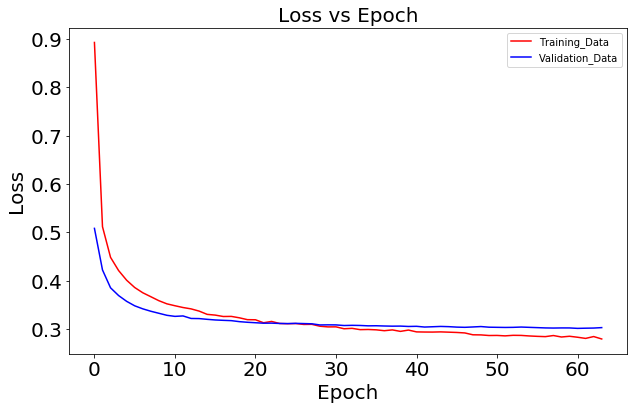

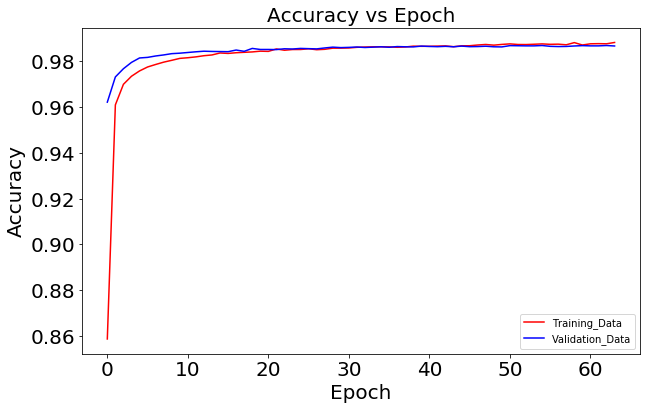

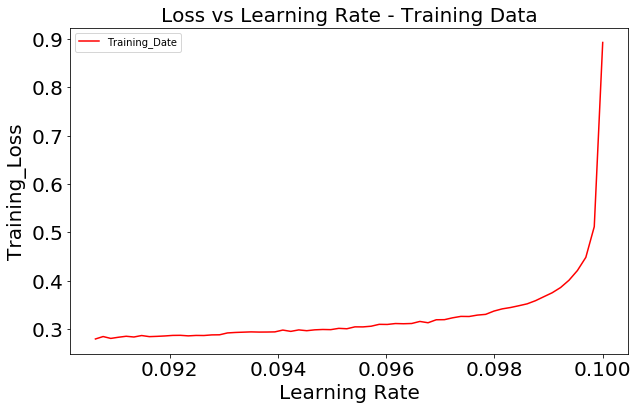

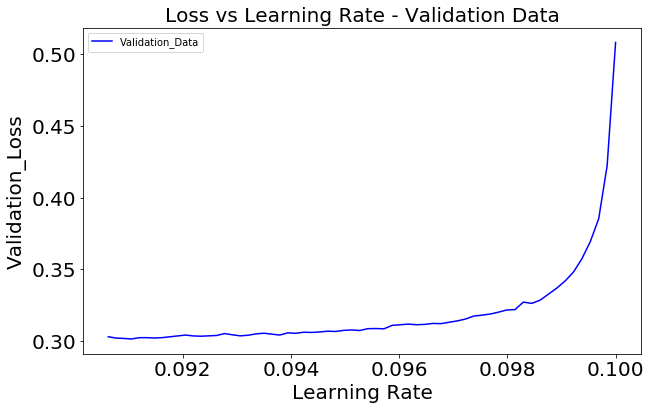

In [64]:
# Plotting for the model with exponential decay and without early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
x = exp_history.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Training_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='r')
plt.legend(["Training_Date"])
plt.show()

# Plotting the Loss vs Learning Rate of Validation data
x = exp_history.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['val_loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Validation Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Validation_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='b')
plt.legend(["Validation_Data"])
plt.show()

# Plot the loss, ignore 20 batches in the beginning and 5 in the end
# callbacks.lr_finder
# lr_finder = LRFinder(model)
# lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)


**The learning rate shoots up when the learning rate is crossing 0.098**

In [65]:
# Setting early stopping
# Desired metric: loss of the validation dataset 
# Training gets terminated at an Epoch when the there is an increase of val_loss value
custom_earlyStopping = EarlyStopping(monitor='val_loss',
                                            min_delta=0.001,
                                            patience=8,
                                            verbose=1,
                                            mode='auto',
                                            baseline=None,
                                            restore_best_weights=False,)

In [66]:
# Fitting model with all params and early stopping (custom values)
exp_history_with_early_stopping = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs,
                            callbacks= [lr_rate, custom_earlyStopping], verbose=1,
                            validation_data=(x_test_flattened, y_test)) 

Epoch 1/64
600/600 [==============================] - 2s 4ms/step - loss: 0.0791 - acc: 0.9762 - val_loss: 0.0910 - val_acc: 0.9737
Epoch 2/64
600/600 [==============================] - 2s 4ms/step - loss: 0.0790 - acc: 0.9761 - val_loss: 0.0909 - val_acc: 0.9735
Epoch 3/64
600/600 [==============================] - 3s 5ms/step - loss: 0.0783 - acc: 0.9761 - val_loss: 0.0906 - val_acc: 0.9736
Epoch 4/64
600/600 [==============================] - 3s 5ms/step - loss: 0.0797 - acc: 0.9754 - val_loss: 0.0908 - val_acc: 0.9737
Epoch 5/64
600/600 [==============================] - 3s 5ms/step - loss: 0.0782 - acc: 0.9762 - val_loss: 0.0906 - val_acc: 0.9735
Epoch 6/64
600/600 [==============================] - 3s 5ms/step - loss: 0.0781 - acc: 0.9761 - val_loss: 0.0908 - val_acc: 0.9734
Epoch 7/64
600/600 [==============================] - 3s 4ms/step - loss: 0.0773 - acc: 0.9756 - val_loss: 0.0906 - val_acc: 0.9741
Epoch 8/64
600/600 [==============================] - 3s 5ms/step - loss: 0.

**With early stopping the validation accuracy is 97.34% and the epochs stops there.**

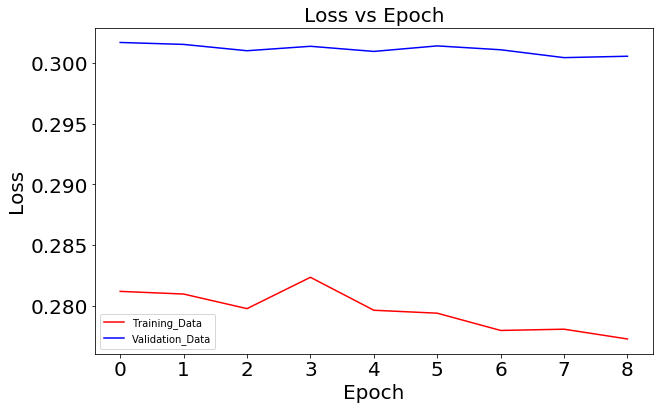

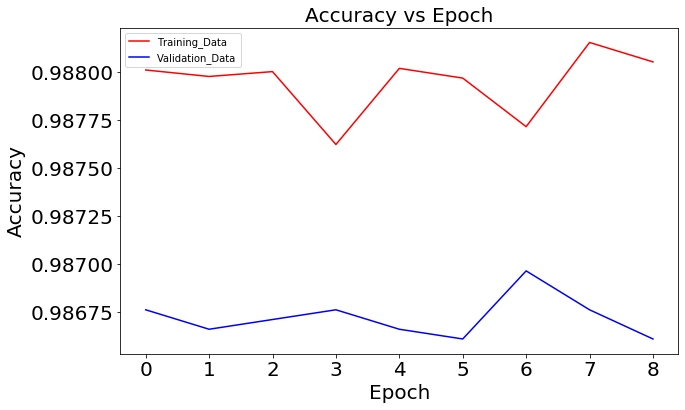

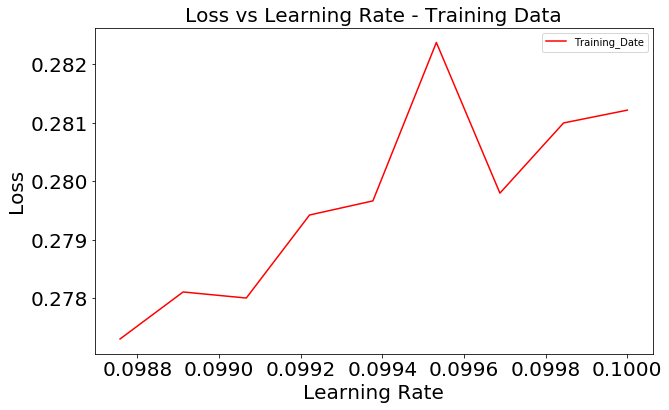

In [67]:
# Plotting for the model with exponential decay and with early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history_with_early_stopping.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_early_stopping.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history_with_early_stopping.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_early_stopping.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
a = exp_history_with_early_stopping.history["lr"]
b = np.sqrt(exp_history_with_early_stopping.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(a, b, color='r')
plt.legend(["Training_Date"])
plt.show()


**The below code is commented because this doesnt work with "./" command, otherwie the code would have displayed the accuracy of validation data that was saved in the local folder which was done using checkpoint**

In [69]:
# # Getting the latest checkpoint file
# checkpoint_dir = os.path.dirname(checkpoint_path)
# latest = tensorflow.train.latest_checkpoint(checkpoint_dir)

# # Create a new model instance
# model_latest_checkpoint = nn_model()

# # Load the previously saved weights
# model_latest_checkpoint.load_weights(latest)

# # Re-evaluate the model
# loss, acc = model_latest_checkpoint.evaluate(x_test_flattened,  y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# Using new model with Sigmoid as activation function  

Below model is created with layers using Sigmoid as activation function. This model performs very bad. This is done for comparing the performance with the previous model which has Relu as activation function. Please consider the accuracy value from the previous model that uses Relu as activation function 

In [70]:
# Building the NN model - 2

def nn_model_with_sigmoid():
    
    # Model type selected
    model = Sequential()
    
    # Dense layers are fully connected layers
    # Adding a input dense layer with input number of nodes = 64, Using Sigmoid as activation function, 
    # setting uniform weights to the nodes 
    model.add(Dense(64, activation='sigmoid', kernel_initializer='uniform', input_dim = input_dim)) 
    
    # Adding dropout at this layer as 20% for avoiding overfitting 
    model.add(Dropout(0.3))
    
    # Adding hidden layer with same params
    model.add(Dense(64, kernel_initializer='uniform', activation='sigmoid'))
    
    # Adding the last layer with softmax activation as this is a multi-class classification problem 
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    
    # Compile the model using loss as categorical_crossentropy as this is a classification problem with the params defined above
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

In [71]:
# Model summary
exp_mode_1 = nn_model_with_sigmoid()
print(exp_mode_1.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
# Fitting model with all params
exp_history_with_sigmoid = exp_mode_1.fit(x_train_flattened, 
                                          y_train, 
                                          batch_size = batch_size,
                                          epochs= epochs,
                                          callbacks= [lr_rate],
                                          verbose=1,
                                          validation_data=(x_test_flattened, y_test))

Epoch 1/64
600/600 [==============================] - 3s 4ms/step - loss: 2.3019 - acc: 0.1098 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/64
600/600 [==============================] - 2s 4ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 3/64
600/600 [==============================] - 3s 5ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/64
600/600 [==============================] - 3s 5ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 5/64
600/600 [==============================] - 2s 4ms/step - loss: 2.3013 - acc: 0.1122 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/64
600/600 [==============================] - 3s 4ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/64
600/600 [==============================] - 2s 4ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 8/64
600/600 [==============================] - 3s 5ms/step - loss: 2.

600/600 [==============================] - 3s 5ms/step - loss: 2.2990 - acc: 0.1124 - val_loss: 2.2987 - val_acc: 0.1135
Epoch 63/64
600/600 [==============================] - 3s 5ms/step - loss: 2.2989 - acc: 0.1124 - val_loss: 2.2986 - val_acc: 0.1135
Epoch 64/64
600/600 [==============================] - 3s 5ms/step - loss: 2.2988 - acc: 0.1124 - val_loss: 2.2985 - val_acc: 0.1135


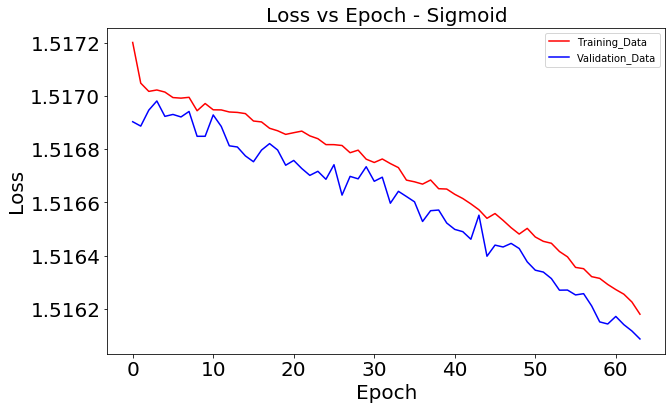

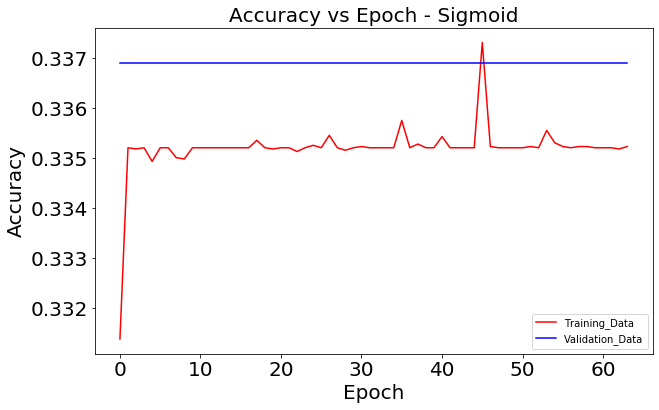

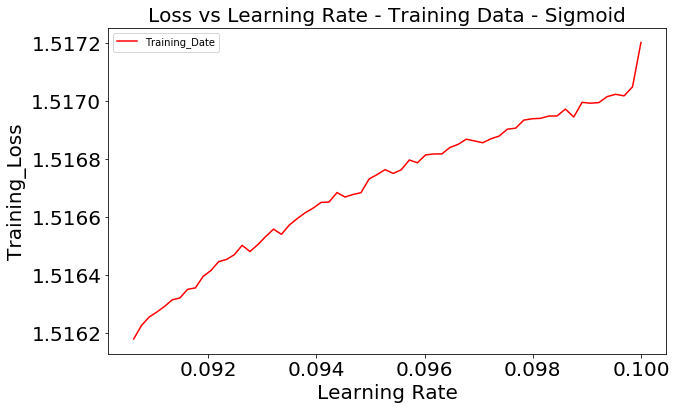

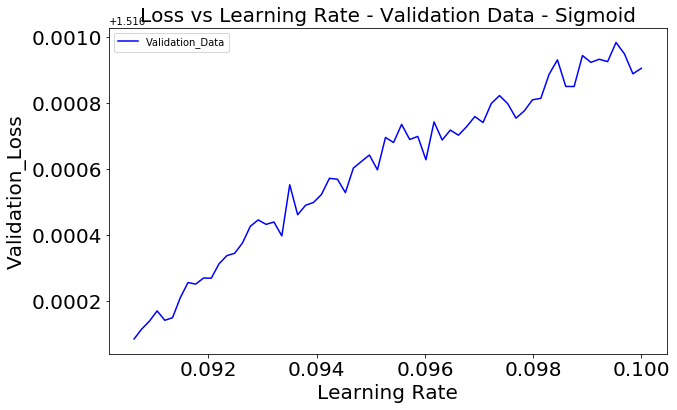

In [73]:
# Plotting for the model with exponential decay and without early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch - Sigmoid', fontsize=20)
ax.plot(np.sqrt(exp_history_with_sigmoid.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_sigmoid.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch - Sigmoid', fontsize=20)
ax.plot(np.sqrt(exp_history_with_sigmoid.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_sigmoid.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
x = exp_history_with_sigmoid.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history_with_sigmoid.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data - Sigmoid', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Training_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='r')
plt.legend(["Training_Date"])
plt.show()

# Plotting the Loss vs Learning Rate of Validation data
x = exp_history_with_sigmoid.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history_with_sigmoid.history['val_loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Validation Data - Sigmoid', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Validation_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='b')
plt.legend(["Validation_Data"])
plt.show()